# BOX COUNTING

In [474]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [475]:
def createSquare(square_resolution):
    square = [[1 for x in range(square_resolution)] for y in range(square_resolution)]
    
    canvas = [[0 for x in range(square_resolution*2)] for y in range(square_resolution*2)]
    
    
    for x in range(square_resolution):
        for y in range(square_resolution):
            canvas[x + int(square_resolution/2)][y + int(square_resolution/2)] = square[x][y]
            
    
    print("\nImage created with resolution:", 2*square_resolution, "x", 2*square_resolution, "\n")
    plt.figure(figsize=(5,5))
    plt.imshow(canvas, cmap="binary")
    plt.show()
    
    return canvas

In [476]:
def createRandom(resolution):
    
    canvas = [[random.randint(0,1) for x in range(resolution)] for y in range(resolution)]
    
    print("\nImage created with resolution:", resolution, "x", resolution, "\n")
    plt.figure(figsize=(5,5))
    plt.imshow(canvas, cmap="binary")
    plt.show()
    
    return canvas

<br><br><br>

In [508]:
def approximate(canvas):
    
    resolution = len(canvas[0])
    
    if resolution < 2:
        print("Cannot loger approximate: resolution boundary achieved")
        return -1
    
    canvas_lowres = [[0 for x in range(int(resolution/2))] for y in range(int(resolution/2))]
    for x in range(int(resolution/2)):
        for y in range(int(resolution/2)):
            if (canvas[2*x][2*y] + canvas[2*x+1][2*y] + canvas[2*x][2*y+1] + canvas[2*x+1][2*y+1]) >= 2:
                canvas_lowres[x][y] = 1
            else: 
                canvas_lowres[x][y] = 0
    
    #print(resolution)
    
    plt.figure(figsize=(5,5))
    plt.imshow(canvas_lowres, cmap="binary")
    plt.show()
    
    return canvas_lowres

In [478]:
def count(canvas):
    
    resolution = len(canvas[0])
    
    total = 0
    for x in range(int(resolution)):
        for y in range(int(resolution)):
            total += canvas[x][y]
            
    return total

In [490]:
def boxcountAlgorithm(canvas):
    
    resolution = len(canvas[0])
    
    boxes = []
    while(resolution >= 2):
    
        resolution = resolution/2 #decrement residual trials
        
        boxes.append(count(canvas))
            
        canvas = approximate(canvas)

    return boxes

In [480]:
def readImage(path):
    img = plt.imread(path)
    
    print("\nOriginal Image\n")
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.imshow(img)
    plt.show()
    
    resolution = max([len(img[0]), len(img)])

    matrix = [[0 for y in range(resolution)] for x in range(resolution)]

    for x in range(len(img)):
        for y in range(len(img[0])):

            if img[x][y][0] == 0:
                matrix[x][y] = 1 

    print("\nConverted Binary Image\n")
    plt.figure(figsize=(10,10))
    plt.imshow(matrix, cmap="binary")
    plt.show()
    
    return matrix, resolution

<br><br><br>


Image created with resolution: 2000 x 2000 



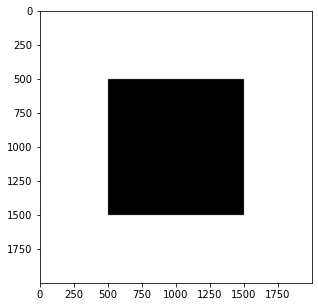

In [481]:
resolution = 1000
canvas = createSquare(resolution)


Image created with resolution: 1000 x 1000 



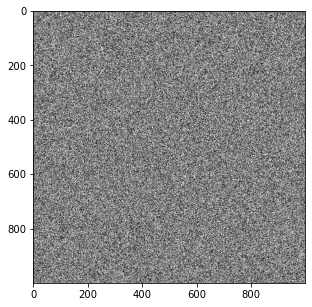

In [482]:
resolution = 1000
canvas = createRandom(resolution)


Original Image



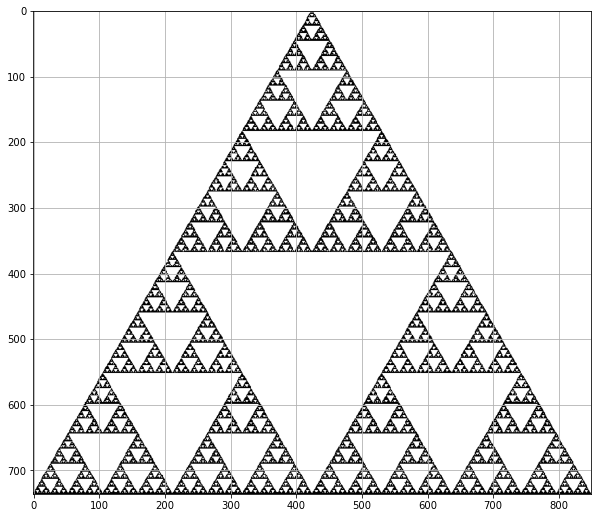


Converted Binary Image



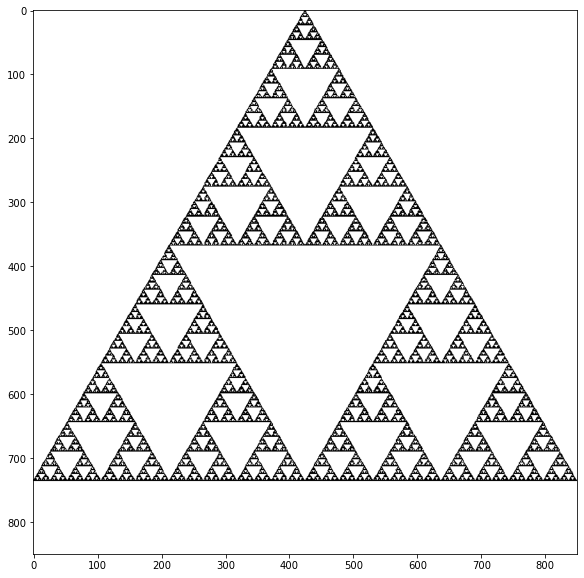

In [509]:
canvas, resolution = readImage("/Users/lucasubitoni/Desktop/serpinsky.bmp")

<br><br><br>

# CALCULATION DIMENSION

We're going to use this formula:

boxes = const * scaling ^ dimension

Thus:

LogN = LogC + D*LogS

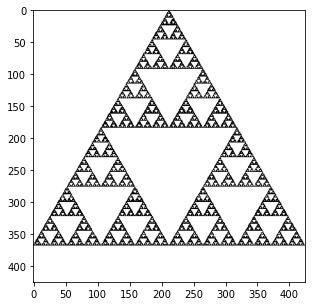

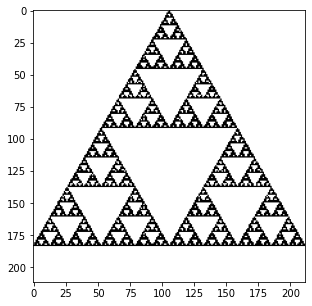

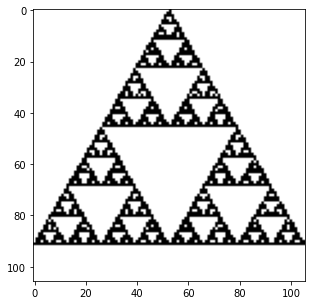

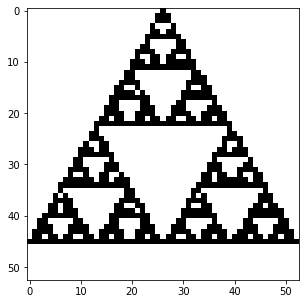

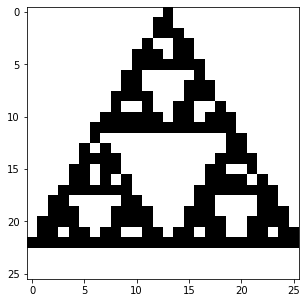

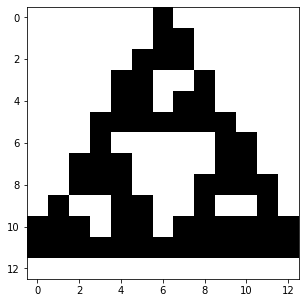

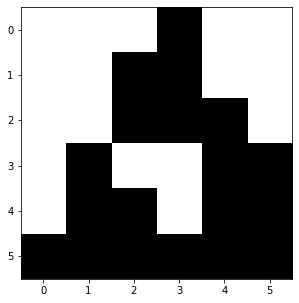

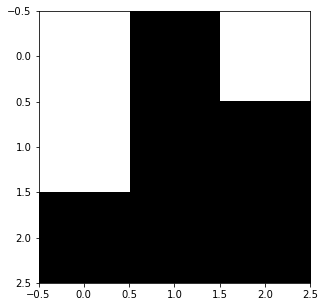

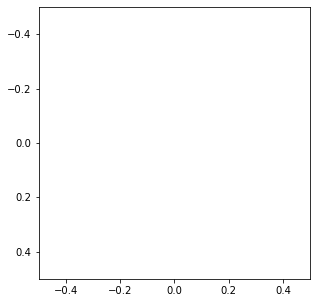

[6, 19, 64, 191, 582, 1771, 5451, 17194, 55768]

In [510]:
boxes = boxcountAlgorithm(canvas)[::-1] #faccio il reverse perchè sto diminuendo la risoluzione al posto che aumentarla
boxes

In [511]:
#Metto il vettore di tutte le risoluzioni => è lo scaling

resolution_vector = [resolution/(2**n) for n in range(len(boxes))][::-1]

#resolution_vector = [4000, 2000, 1000, 500, 250, 125, 62, 31, 15, 7, 3][::-1]
resolution_vector

[3.3203125, 6.640625, 13.28125, 26.5625, 53.125, 106.25, 212.5, 425.0, 850.0]

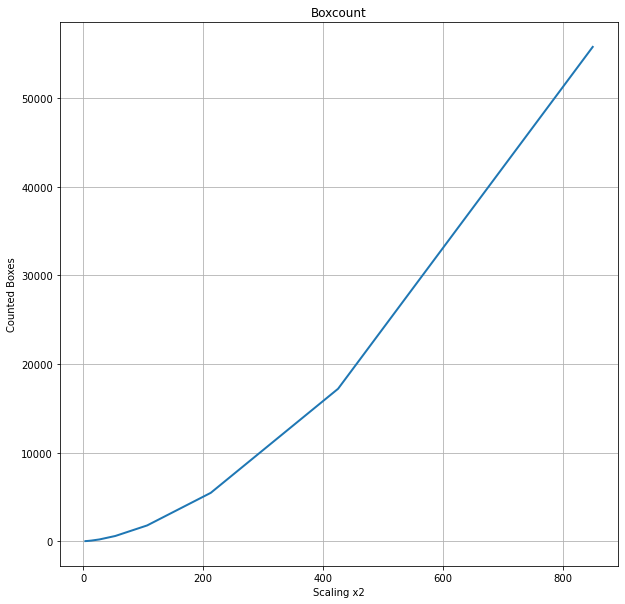

In [512]:
plt.figure(figsize=(10,10))
plt.plot(resolution_vector, boxes, lw=2)
plt.grid()
plt.title("Boxcount")
plt.xlabel("Scaling x2")
plt.ylabel("Counted Boxes")
plt.show()

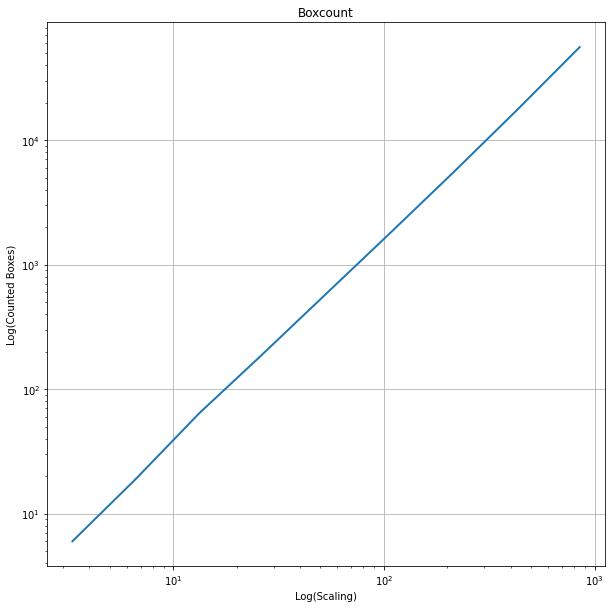

In [513]:
plt.figure(figsize=(10,10))
plt.loglog(resolution_vector, boxes, lw=2)
plt.grid()
plt.title("Boxcount")
plt.xlabel("Log(Scaling)")
plt.ylabel("Log(Counted Boxes)")
plt.show()

log_boxes = [math.log(boxes[i]) for i in range(len(boxes))]
log_res = [math.log(resolution_vector[i]) for i in range(len(resolution_vector))]

# Estimating Boxcount Dimension through last finite difference 


Boxcounting Dimension:
 1.6975323213192905 



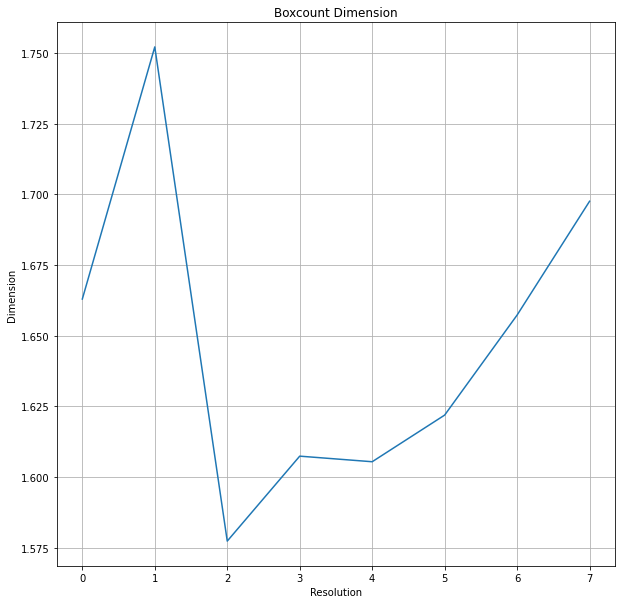

In [514]:
#I use finite differences insteat of the derivative to estimate the slope of the log log graph

boxcounting_dimension = np.diff(log_boxes,1)/np.diff(log_res,1)

print("\nBoxcounting Dimension:\n", (boxcounting_dimension[-1]), "\n")



plt.figure(figsize=(10,10))
plt.grid()
plt.title("Boxcount Dimension")
plt.xlabel("Resolution")
plt.ylabel("Dimension")
plt.plot(boxcounting_dimension)
plt.show()

# Estimating Boxcount Dimension through linear regression

In [515]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(log_res).reshape(-1, 1), log_boxes)

print("The regression line is: \n\n y = (", reg.coef_[0],")x + (", reg.intercept_,")\n")

print("Thus the estimated box counting dimension is the angular coefficient: ", reg.coef_[0])

The regression line is: 

 y = ( 1.6371891659574573 )x + ( -0.1397589139047648 )

Thus the estimated box counting dimension is the angular coefficient:  1.6371891659574573
